In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score


merged_data = pd.read_csv(r"C:\Users\mcarl\OneDrive\Ambiente de Trabalho\Modelação e Simulaçao\MS_G18_2425\simulation_results.csv")

X = merged_data[
    [
        "wealth",
            "career_years",
            "sex",
            "job_status",
            "has_disease",
            "has_car",
            "has_house",
            "num_children",
            "personal_luxuries",
            "health_care_cost",
    ]
]

y = merged_data["group"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

y.value_counts()

group
1    21086
0    18946
Name: count, dtype: int64

In [2]:
model = joblib.load(r"C:\Users\mcarl\OneDrive\Ambiente de Trabalho\Modelação e Simulaçao\MS_G18_2425\models\LightGBM_nl.pkl")
y_pred = model.predict(X_test)

nchildren = X_test["num_children"]

mf = MetricFrame(
    metrics=accuracy_score, y_true=y_test, y_pred=y_pred, sensitive_features=nchildren
)

print("Overall Metric Frame: ", mf.overall)
print("\nMetric Frame by group: ", mf.by_group)

C:\Users\mcarl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.6.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Overall Metric Frame:  0.6201498751040799

Metric Frame by group:  num_children
0    0.592701
1    0.682561
2    0.651697
3    0.706250
Name: accuracy_score, dtype: float64


The Overall Metric Frame value of 0.6201 represents the specified overall performance metric (accuracy) across all groups combined. This suggests that the model’s accuracy is about 62.0% when evaluated on the entire dataset, without differentiating between groups based on the num_children feature.

MetricFrame by_group:
               accuracy  precision  false positive rate  false negative rate  \
num_children                                                                  
0             0.592701   0.550366             0.791535             0.017756   
1             0.682561   0.664318             0.784706             0.023669   
2             0.651697   0.616345             0.754464             0.019856   
3             0.706250   0.692946             0.556391             0.106952   

              selection rate   count  
num_children                          
0                   0.886236  8166.0  
1                   0.902361  2202.0  
2                   0.879242  1002.0  
3                   0.753125   640.0  


array([[<Axes: title={'center': 'accuracy'}, xlabel='num_children'>,
        <Axes: title={'center': 'precision'}, xlabel='num_children'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='num_children'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='num_children'>,
        <Axes: title={'center': 'selection rate'}, xlabel='num_children'>,
        <Axes: title={'center': 'count'}, xlabel='num_children'>],
       [<Axes: xlabel='num_children'>, <Axes: xlabel='num_children'>,
        <Axes: xlabel='num_children'>]], dtype=object)

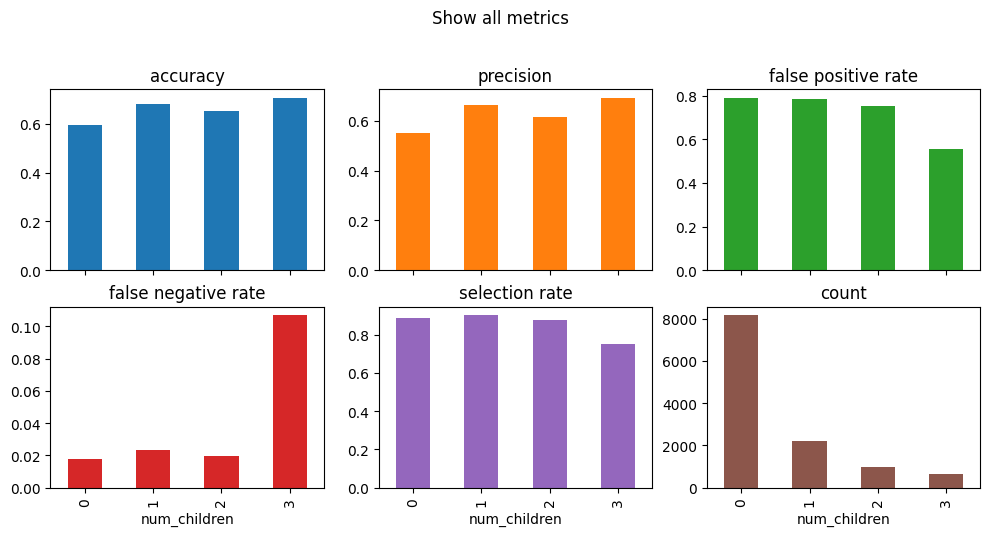

In [ ]:
from fairlearn.metrics import (MetricFrame,  false_positive_rate,
    false_negative_rate, selection_rate, count)
from sklearn.metrics import (
    accuracy_score,
    precision_score
)

metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
    "count": count,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=nchildren
)

metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

In [4]:
from fairlearn.reductions import DemographicParity, ExponentiatedGradient

np.random.seed(42)

constraint = DemographicParity()
nchildren = X_train["num_children"]
mitigator = ExponentiatedGradient(model, constraint)
mitigator.fit(X_train, y_train, sensitive_features=nchildren)

y_pred_mitigated = mitigator.predict(X_test)

nchildren = X_test["num_children"]
sr_mitigated = MetricFrame(metrics=selection_rate, y_true=y_test, y_pred=y_pred_mitigated, sensitive_features=nchildren)

sr_mitigated.overall

0.556119900083264

In [5]:
print("\nMetric Frame by group: ", sr_mitigated.by_group)


Metric Frame by group:  num_children
0    0.552290
1    0.572207
2    0.545908
3    0.565625
Name: selection_rate, dtype: float64
